## 3D Isotropic Quantum Harmonic Oscillator - Dynamic Simulation
### Case 3.3 - Finite Superposition of Spherical Eigenstates

<br>

Static simulation of the wave function given by the initial superposition

$$ \Psi(\mathbf{r},0) = \left( \frac{1}{3} \psi_{0,2}^{1} - \frac{2\mathrm{i}}{5} \psi_{1,1}^{-1} + \frac{1}{2} \psi_{1,2}^{2} \right) $$

at time $t = 0$ .

This notebook contains graphs of:
* the initial probability density function $|\Psi(\mathbf{r},0)|^2$ on planes $(x,y)$, $(x,z)$ and $(y,z)$ ,
* the initial probability density function $|\Psi(\mathbf{r},0)|^2$ on the sphere $r = 1$ ,
* Hammer's projection of the previous graph.


#### Import libraries and functions


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import qho_eigen as qho
from math_tools import *


#### Initialize state $\Psi(\mathbf{r},0)$


In [2]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
x_min = -3
x_max = 3
dx = 0.05
x = np.linspace(x_min, x_max, int((x_max - x_min) / dx) + 1) # np.linspace handles edges better

y_min = -3
y_max = 3
dy = 0.05
y = np.linspace(y_min, y_max, int((y_max - y_min) / dy) + 1) # np.linspace handles edges better

z_min = -3
z_max = 3
dz = 0.05
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1) # np.linspace handles edges better

Y, Z, X = np.meshgrid(y, z, x) # This is because of NumPy's row-major order
R, THETA, PHI = cart2sph(X, Y, Z)

# Compute eigenstates
N = 3
n = np.vstack(np.array([0,  1,  1]), dtype=object)
l = np.vstack(np.array([2,  1,  2]), dtype=object)
m = np.vstack(np.array([1, -1,  2]), dtype=object)
eigenfuns = np.zeros((N, np.size(z), np.size(y), np.size(x)), dtype=np.complex128)

for i in range(N):
    eigenfuns[i] = qho.eigen3D_sph(s, n[i][0], l[i][0], m[i][0], R, THETA, PHI)

# Initialize wave function
A = 30 / math.sqrt(469)
psi0 = A * (1/3*eigenfuns[0] - 2j/5*eigenfuns[1] + 1/2*eigenfuns[2])

# Compute eigenstate coefficients
c = A * np.vstack(np.array([1/3, -2j/5, 1/2]))

# Verify normalization of probability density function
print(f'Integral of |Ψ(r,0)|² = {np.trapz(np.trapz(np.trapz(abs2(psi0), x=x, axis=2), x=y, axis=1), x=z)}')
print()


Integral of |Ψ(r,0)|² = 0.9999675498773208



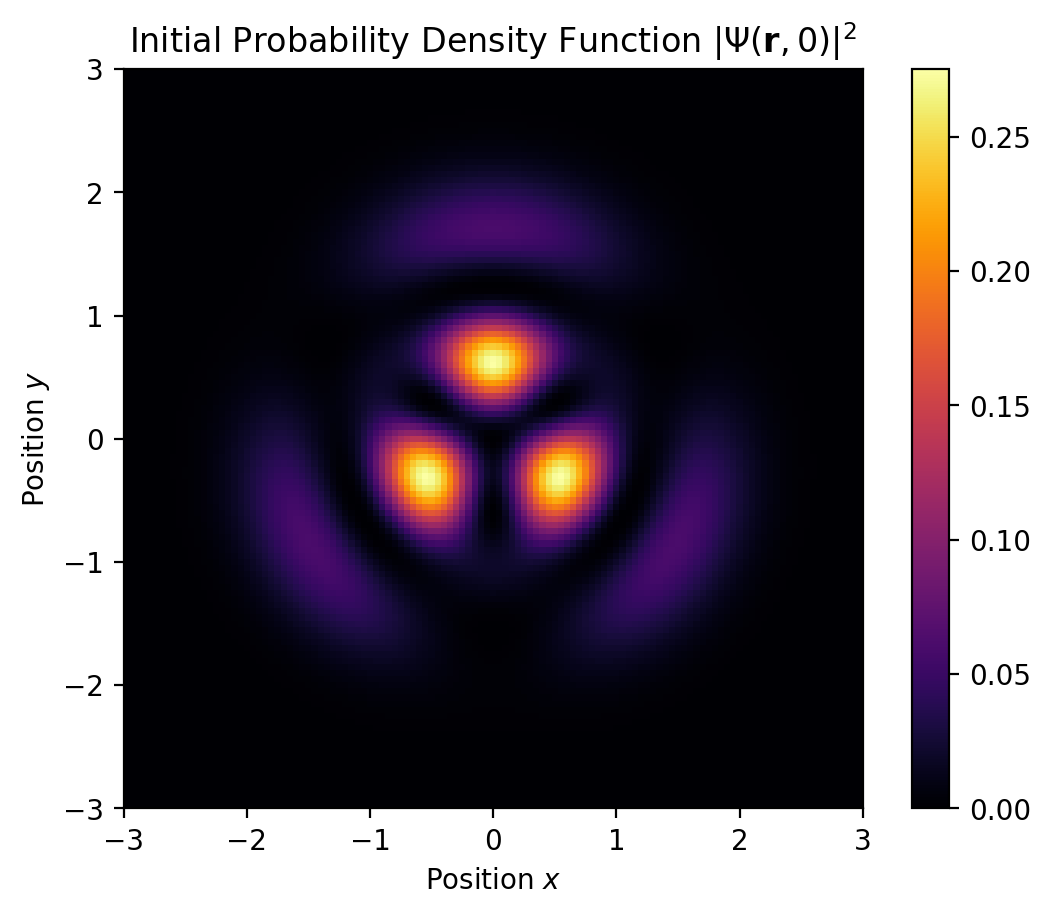

In [3]:
# Plot initial probability density function on planes
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X[60,:,:], Y[60,:,:], abs2(psi0[60,:,:]), cmap='inferno')
ax.set_title(r'Initial Probability Density Function $|\Psi(\mathbf{r},0)|^2$')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

ax.set_xlim(x_min, x_max), ax.set_ylim(y_min, y_max)
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


#### Initialize state $\Psi(\mathbf{r},0)$ on sphere $r = 1$


In [4]:
# Define physical constants
hbar = 1
M = 2
w = 1
s = math.sqrt(2 * hbar / (M * w))

# Set up coordinate system
r = 1

theta_min = 0
theta_max = math.pi
theta_N = 201
theta = np.linspace(theta_min, theta_max, theta_N)

phi_min = -math.pi # Using (-pi,pi] instead of [0,2pi) for Hammer's projection
phi_max = math.pi
phi_N = 201
phi = np.linspace(phi_min, phi_max, phi_N)

THETA, PHI = np.meshgrid(theta, phi)
X, Y, Z = sph2cart(r, THETA, PHI)

# Compute eigenstates
N = 3
n = np.vstack(np.array([0,  1,  1]), dtype=object)
l = np.vstack(np.array([2,  1,  2]), dtype=object)
m = np.vstack(np.array([1, -1,  2]), dtype=object)
eigenfuns = np.zeros((N, np.size(phi), np.size(theta)), dtype=np.complex128)

for i in range(N):
    eigenfuns[i] = qho.eigen3D_sph(s, n[i][0], l[i][0], m[i][0], r, THETA, PHI)

# Initialize wave function
A = 30 / math.sqrt(469)
psi0 = A * (1/3*eigenfuns[0] - 2j/5*eigenfuns[1] + 1/2*eigenfuns[2])

# Compute eigenstate coefficients
c = A * np.vstack(np.array([1/3, -2j/5, 1/2]))

# Verify normalization of probability density function
# print(f'Integral of |Ψ(r,0)|² = {np.trapz(np.trapz(np.trapz(abs2(psi0) * np.sin(THETA), x=r, axis=2), x=theta, axis=1), x=phi)}')
print()


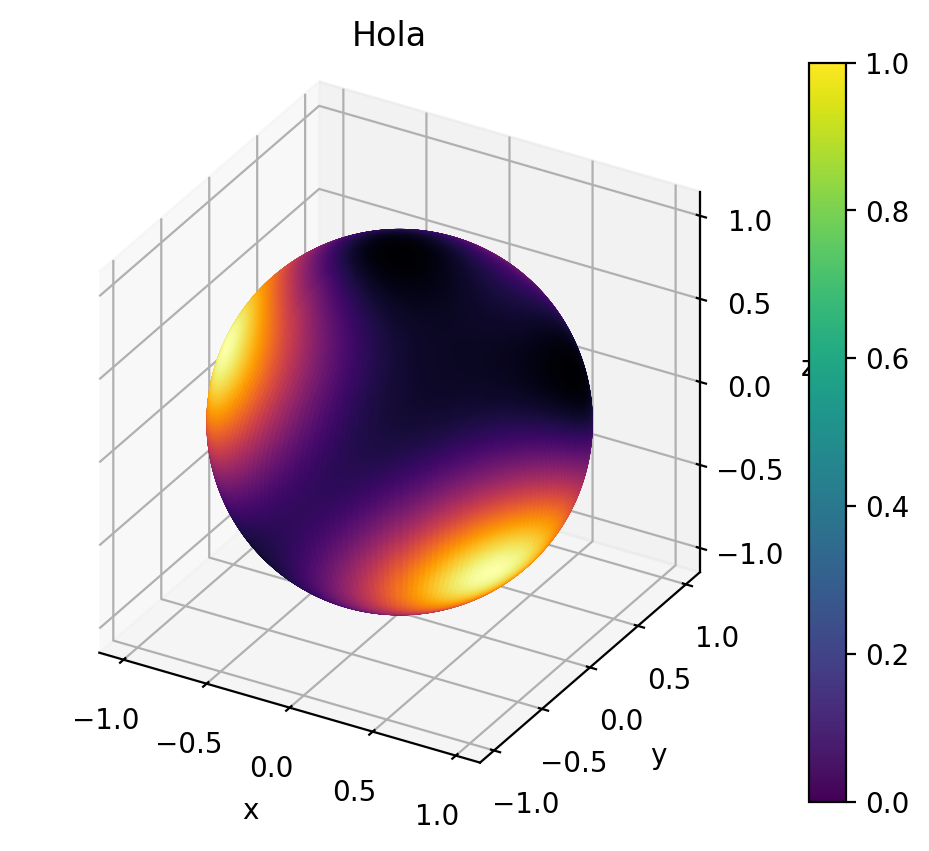

In [5]:
facecolors = plt.cm.inferno((abs2(psi0) - abs2(psi0).min()) / (abs2(psi0).max() - abs2(psi0).min()))

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
surf = ax.plot_surface(X,Y,Z, facecolors=facecolors, rstride=1, cstride=1, shade=False)
ax.set_title('Hola')
ax.set_xlabel('x'), ax.set_ylabel('y'), ax.set_zlabel('z')

ax.set_zlim(-1.1, 1.1)

ax.set_proj_type('ortho')
ax.set_aspect('equal', adjustable='box')

fig.colorbar(surf, ax=ax)

plt.show()


#### Hammer projection


C:\Users\User\AppData\Local\Temp\ipykernel_1304\2103863735.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X_HAMMER, Y_HAMMER, abs2(psi0), cmap='inferno', vmin=0)


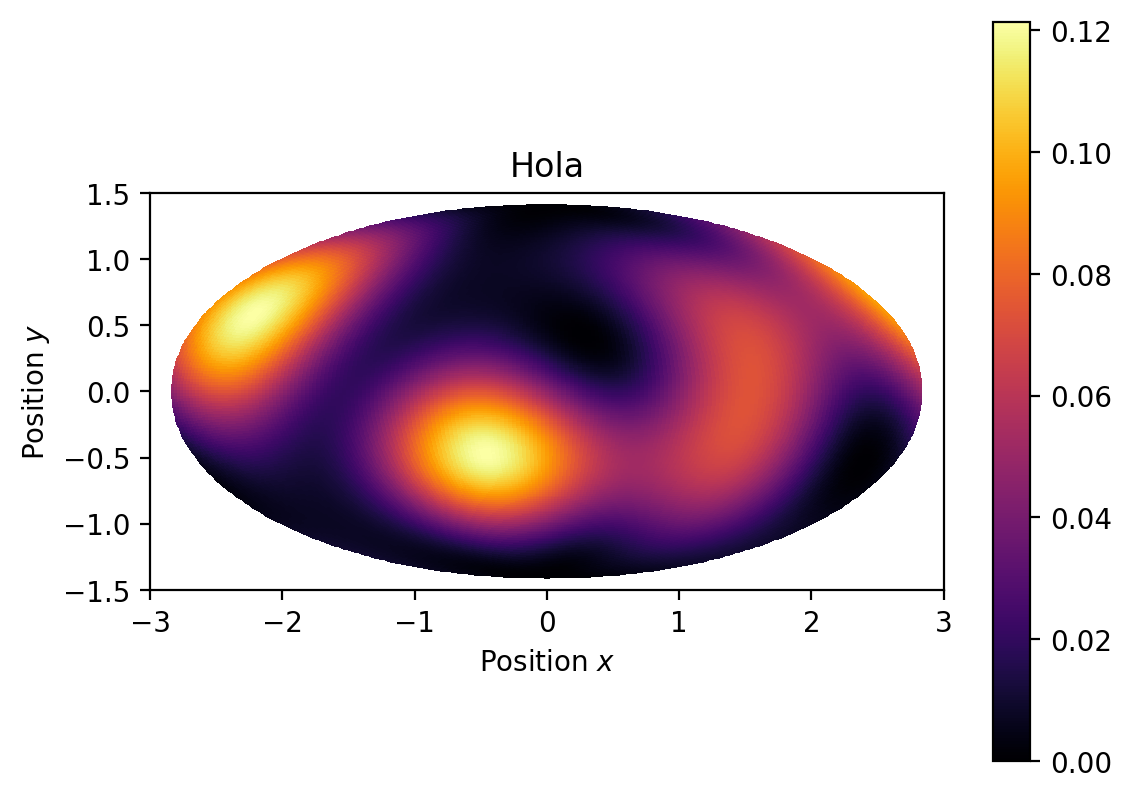

In [6]:
# Transform angular to cartesian coordinates using Hammer's projection
X_HAMMER, Y_HAMMER = hammer_ang2cart(THETA, PHI)

# Plot Hammer's projection
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X_HAMMER, Y_HAMMER, abs2(psi0), cmap='inferno', vmin=0)
ax.set_title(r'Hola')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

# ax.set_xlim(-math.sqrt(8), math.sqrt(8)), ax.set_ylim(-math.sqrt(2), math.sqrt(2))
ax.set_xlim(-3, 3), ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1304\422442485.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcmesh = ax.pcolormesh(X_HAMMER, Y_HAMMER, (qho.sph_harm(4,3,THETA,PHI).real), cmap='seismic', vmin=0)


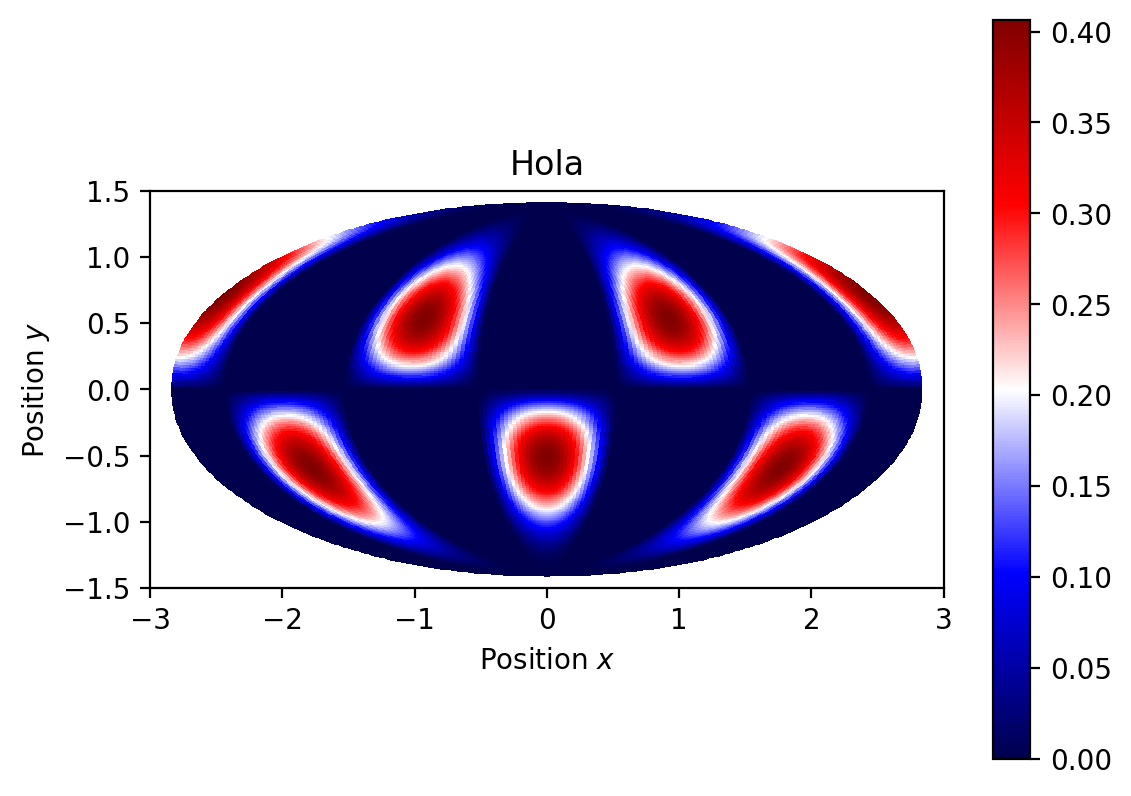

In [20]:
# Plot Hammer's projection
fig, ax = plt.subplots()
pcmesh = ax.pcolormesh(X_HAMMER, Y_HAMMER, (qho.sph_harm(4,3,THETA,PHI).real), cmap='seismic', vmin=0)
ax.set_title(r'Hola')
ax.set_xlabel('Position $x$'), ax.set_ylabel('Position $y$')

# ax.set_xlim(-math.sqrt(8), math.sqrt(8)), ax.set_ylim(-math.sqrt(2), math.sqrt(2))
ax.set_xlim(-3, 3), ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', adjustable='box')

fig.colorbar(pcmesh, ax=ax)

plt.show()
